In [3]:
!pip install qiskit-machine-learning


     |████████████████████████████████| 96 kB 2.5 MB/s 
     |████████████████████████████████| 6.1 MB 14.9 MB/s 
     |████████████████████████████████| 943 kB 48.9 MB/s 
     |████████████████████████████████| 1.4 MB 37.8 MB/s 
     |████████████████████████████████| 38.2 MB 25 kB/s 
     |████████████████████████████████| 49 kB 5.0 MB/s 
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24081 sha256=3d8bdd06d4fa53fb641e300173e2f2e2c04230d710bb7554fd0b0ad983a62bb4
  Stored in directory: /root/.cache/pip/wheels/07/27/db/1222c80eb1e431f3d2199c12569cb1cac60f562a451fe30479
Successfully built python-constraint


In [5]:
!pip install --upgrade qiskit

     |████████████████████████████████| 17.9 MB 114 kB/s 
     |████████████████████████████████| 237 kB 73.7 MB/s 
     |████████████████████████████████| 207 kB 71.7 MB/s 
     |████████████████████████████████| 2.1 MB 38.4 MB/s 
     |████████████████████████████████| 634 kB 40.1 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 3.5 MB 51.8 MB/s 
     |████████████████████████████████| 6.3 MB 71.3 MB/s 
  Created wheel for qiskit: filename=qiskit-0.32.0-py3-none-any.whl size=11773 sha256=10f1459d73669179f21ede3058db96a8b19f8a5fa464f6adb7d72112cc6ddbad
  Stored in directory: /root/.cache/pip/wheels/95/84/c4/6a084a33c1909266fca66eed2303c3883e03f33c905b1ebed9
  Created wheel for dlx: filename=dlx-1.0.4-py3-none-any.whl size=5719 sha256=a8537a7a4f278be49fb5f875dddca4ccfac3ed9701a09decdf835e6a1fde25e3
  Stored in directory: /root/.cache/pip/wheels/78/55/c8/dc61e772445a566b7608a476d151e9dcaf4e092b01b0c4bc3c
  Created wheel for docplex: f

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua import QuantumInstance, aqua_globals
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name
from qiskit.ml.datasets import ad_hoc_data, sample_ad_hoc_data
from qiskit.aqua.algorithms import SklearnSVM

seed = 10599
aqua_globals.random_seed = seed

/usr/local/lib/python3.7/dist-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/usr/local/lib/python3.7/dist-packages/qiskit/ml/__init__.py:40: DeprecationWarning: The package qiskit.ml is deprecated. It was moved/refactored to qiskit_machine_learning (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('ml', 'qiskit_machine_learning', 'qiskit-machine-learning')
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: The variable qiskit.aqua.aqua_globals is deprecated. It was moved/refactored to qiskit.utils.algorithm_globals (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.m

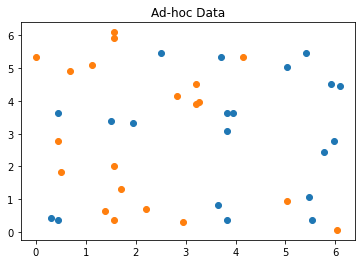

{'A': 0, 'B': 1}


In [2]:
feature_dim = 2
sample_total, training_input, test_input, class_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
extra_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
datapoints, class_to_lbl = split_dataset_to_data_and_labels(extra_test_data)
print(class_to_lbl)


In [3]:
featur_map = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement='linear')
qsvm = QSVM(featur_map, training_input, test_input, datapoints[0])

backend = BasicAer.get_backend('qasm_simulator')
quantum_instance = QuantumInstance(backend, shots=1024, seed_simulator=seed, seed_transpiler=seed)

result = qsvm.run(quantum_instance)

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')


/usr/local/lib/python3.7/dist-packages/qiskit/aqua/algorithms/classifiers/qsvm/qsvm.py:104: DeprecationWarning: The package qiskit.aqua.algorithms.classifiers is deprecated. It was moved/refactored to qiskit_machine_learning.algorithms.classifiers (pip install qiskit-machine-learning). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-machine-learning')
/usr/local/lib/python3.7/dist-packages/qiskit/aqua/quantum_instance.py:137: DeprecationWarning: The class qiskit.aqua.QuantumInstance is deprecated. It was moved/refactored to qiskit.utils.QuantumInstance (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  'qiskit-terra')


Testing success ratio: 1.0

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  success rate: 100.0%


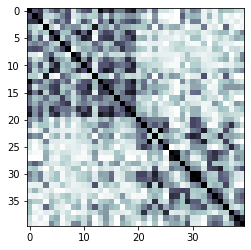

In [4]:
kernel_matrix = result['kernel_matrix_training']
plt.imshow(np.asmatrix(kernel_matrix),interpolation='nearest',origin='upper',cmap='bone_r');


In [5]:
result = SklearnSVM(training_input, test_input, datapoints[0]).run()

print(f'Testing success ratio: {result["testing_accuracy"]}')
print()
print('Prediction from datapoints set:')
print(f'  ground truth: {map_label_to_class_name(datapoints[1], qsvm.label_to_class)}')
print(f'  prediction:   {result["predicted_classes"]}')
predicted_labels = result["predicted_labels"]
print(f'  success rate: {100*np.count_nonzero(predicted_labels == datapoints[1])/len(predicted_labels)}%')



Testing success ratio: 0.65

Prediction from datapoints set:
  ground truth: ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B']
  prediction:   ['B', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'A', 'A', 'A', 'B', 'B', 'B', 'A', 'B', 'A', 'B', 'B', 'A']
  success rate: 55.0%
